In [ ]:
# 下記セルを実行すると、authorization codeの入力を求められます。
# 出力されたリンク先をクリックし、Googleアカウントにログインし、
# authorization codeをコピーし、貼り付けをおこなってください。
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os 
project = '100knock-AImodel'
chapter = 10
os.chdir(f'/content/drive/MyDrive/{project}/chapter-{chapter}/')

#第１０章　AutoMLでモデル構築評価を行う10本ノック

## ノック91:PyCaretで回帰モデルの前処理を実施しよう

In [ ]:
!pip install pycaret
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
from pycaret.datasets import get_data 
boston_data_all = get_data("boston")

crim    zn  indus  chas    nox  ...  tax  ptratio   black  lstat  medv
0  0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2

[5 rows x 14 columns]

In [ ]:
boston_data = boston_data_all.sample(frac =0.90, random_state = 0).reset_index(drop=True)
boston_data_unseen = boston_data_all.drop(boston_data.index).reset_index(drop=True)
print("All Data: " + str(boston_data_all.shape))
print("Data for Modeling: " + str(boston_data.shape))
print("Unseen Data For Predictions: " + str(boston_data_unseen.shape))

All Data: (506, 14)
Data for Modeling: (455, 14)
Unseen Data For Predictions: (51, 14)


In [ ]:
from pycaret.regression import *
ret = setup(boston_data
      , target = "medv"
      , normalize = False
      , session_id=0)

IntProgress(value=0, description='Processing: ', max=3)

Initiated  . . . . . . . . . . . . . . . . . .            16:52:49
Status     . . . . . . . . . . . . . . . . . .  Preprocessing Data

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

Data Type
crim         Numeric
zn           Numeric
indus        Numeric
chas     Categorical
nox          Numeric
rm           Numeric
age          Numeric
dis          Numeric
rad      Categorical
tax          Numeric
ptratio      Numeric
black        Numeric
lstat        Numeric
medv           Label

quit


SystemExit: ignored

In [ ]:
from pycaret.regression import *
ret = setup(boston_data
      , target = "medv"
      , session_id=0
      , normalize = False
      , numeric_features = ["chas"]
      , categorical_features = ["rad"])

Description             Value
0                               session_id                 0
1                                   Target              medv
2                            Original Data         (455, 14)
3                           Missing Values             False
4                         Numeric Features                12
5                     Categorical Features                 1
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set         (318, 21)
10                    Transformed Test Set         (137, 21)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              d740
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

## ノック92:PyCaretでtrain_sizeを変更してみよう

In [ ]:
ret = setup(boston_data
      , target = "medv"
      , session_id=0
      , normalize = False
      , numeric_features = ["chas"]
      , categorical_features = ["rad"]
      , train_size = 0.8
      , silent=True)

Description             Value
0                               session_id                 0
1                                   Target              medv
2                            Original Data         (455, 14)
3                           Missing Values             False
4                         Numeric Features                12
5                     Categorical Features                 1
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set         (364, 21)
10                    Transformed Test Set          (91, 21)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              fc28
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

## ノック93:PyCaretで回帰モデルを構築しよう

In [ ]:
models()

Name  ...  Turbo
ID                                           ...       
lr                        Linear Regression  ...   True
lasso                      Lasso Regression  ...   True
ridge                      Ridge Regression  ...   True
en                              Elastic Net  ...   True
lar                  Least Angle Regression  ...   True
llar           Lasso Least Angle Regression  ...   True
omp             Orthogonal Matching Pursuit  ...   True
br                           Bayesian Ridge  ...   True
ard       Automatic Relevance Determination  ...  False
par            Passive Aggressive Regressor  ...   True
ransac              Random Sample Consensus  ...  False
tr                       TheilSen Regressor  ...  False
huber                       Huber Regressor  ...   True
kr                             Kernel Ridge  ...  False
svm               Support Vector Regression  ...  False
knn                   K Neighbors Regressor  ...   True
dt                  Decision Tree Regressor  ...   True
rf                  Random Forest Regressor  ...   True
et                    Extra Trees Regressor  ...   True
ada                      AdaBoost Regressor  ...   True
gbr             Gradient Boosting Regressor  ...   True
mlp                           MLP Regressor  ...  False
lightgbm    Light Gradient Boosting Machine  ...   True

[23 rows x 3 columns]

In [ ]:
compare_models(sort = "R2", fold = 10)

Model     MAE      MSE    RMSE      R2  \
et                  Extra Trees Regressor  2.1839   9.5456  3.0433  0.8761   
gbr           Gradient Boosting Regressor  2.1968   9.3363  3.0085  0.8746   
lightgbm  Light Gradient Boosting Machine  2.3779  11.9894  3.4159  0.8436   
ada                    AdaBoost Regressor  2.6713  12.6488  3.5252  0.8343   
rf                Random Forest Regressor  2.4777  13.1299  3.5434  0.8311   
lr                      Linear Regression  3.4096  23.6076  4.7780  0.7074   
ridge                    Ridge Regression  3.3909  23.8042  4.7885  0.7055   
br                         Bayesian Ridge  3.4111  24.4277  4.8448  0.6996   
lar                Least Angle Regression  3.5619  24.9114  4.9069  0.6911   
huber                     Huber Regressor  3.3176  26.8915  5.0054  0.6771   
en                            Elastic Net  3.7411  28.6580  5.2347  0.6632   
lasso                    Lasso Regression  3.7372  29.0086  5.2582  0.6608   
dt                Decision Tree Regressor  3.4523  27.9222  5.1502  0.6517   
omp           Orthogonal Matching Pursuit  4.2817  34.6187  5.7817  0.5882   
knn                 K Neighbors Regressor  4.5713  44.4640  6.5753  0.4332   
par          Passive Aggressive Regressor  6.5403  78.9600  8.7544  0.0046   
llar         Lasso Least Angle Regression  6.7711  87.2345  9.1953 -0.0331   

           RMSLE    MAPE  TT (Sec)  
et        0.1401  0.1107     0.457  
gbr       0.1395  0.1109     0.108  
lightgbm  0.1505  0.1185     0.099  
ada       0.1708  0.1432     0.114  
rf        0.1585  0.1257     0.556  
lr        0.2249  0.1714     0.326  
ridge     0.2287  0.1714     0.015  
br        0.2331  0.1726     0.015  
lar       0.2308  0.1774     0.018  
huber     0.2447  0.1646     0.044  
en        0.2401  0.1819     0.015  
lasso     0.2414  0.1824     0.015  
dt        0.2225  0.1738     0.021  
omp       0.3069  0.2136     0.013  
knn       0.2481  0.2097     0.064  
par       0.4219  0.3282     0.018  
llar      0.3913  0.3672     0.015

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=0, verbose=0, warm_start=False)

## ノック94:PyCaretでハイパーパラメータをチューニングしよう

In [ ]:
rf = create_model("rf", fold = 10)

MAE      MSE    RMSE      R2   RMSLE    MAPE
0     2.6951  17.7577  4.2140  0.8038  0.1707  0.1078
1     2.4529  11.0652  3.3264  0.9005  0.1622  0.1285
2     2.5246  11.3592  3.3703  0.8075  0.1525  0.1193
3     2.7081  22.7144  4.7660  0.6342  0.1783  0.1355
4     2.8522  21.2313  4.6077  0.7764  0.1977  0.1620
5     2.5445  11.2662  3.3565  0.9245  0.1736  0.1454
6     2.0312   6.8169  2.6109  0.8758  0.1411  0.1199
7     2.6908  14.6318  3.8252  0.8657  0.1668  0.1330
8     2.0722   5.9796  2.4453  0.9177  0.1153  0.0979
9     2.2050   8.4769  2.9115  0.8045  0.1271  0.1076
Mean  2.4777  13.1299  3.5434  0.8311  0.1585  0.1257
SD    0.2705   5.5197  0.7578  0.0825  0.0236  0.0183

In [ ]:
tuned_rf = tune_model(rf, optimize = "r2", fold = 10)
tuned_rf

MAE      MSE    RMSE      R2   RMSLE    MAPE
0     3.0067  24.7128  4.9712  0.7270  0.1684  0.1143
1     2.6783  13.3939  3.6598  0.8796  0.1554  0.1315
2     2.1061   6.9402  2.6344  0.8824  0.1195  0.1020
3     2.3236   9.8265  3.1347  0.8417  0.1271  0.1076
4     3.4036  34.1707  5.8456  0.6401  0.2276  0.1853
5     2.9022  13.4361  3.6655  0.9100  0.1628  0.1463
6     2.0842   6.3144  2.5128  0.8850  0.1483  0.1268
7     3.1428  20.3447  4.5105  0.8132  0.1911  0.1512
8     2.2145   8.1430  2.8536  0.8879  0.1199  0.0996
9     2.1484   7.7533  2.7845  0.8211  0.1366  0.1107
Mean  2.6010  14.5036  3.6573  0.8288  0.1557  0.1275
SD    0.4628   8.7160  1.0621  0.0807  0.0323  0.0256

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.05,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=9, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
tuned_rf = tune_model(rf, optimize = "r2", fold = 10, n_iter = 50)
tuned_rf

MAE      MSE    RMSE      R2   RMSLE    MAPE
0     2.6705  17.5881  4.1938  0.8057  0.1576  0.1073
1     2.6953  13.2585  3.6412  0.8808  0.1559  0.1325
2     2.0749   6.7700  2.6019  0.8853  0.1212  0.1030
3     2.3891  10.1788  3.1904  0.8361  0.1330  0.1136
4     3.1798  27.4997  5.2440  0.7104  0.2158  0.1802
5     2.7368  11.4151  3.3786  0.9235  0.1550  0.1404
6     2.0337   5.9824  2.4459  0.8910  0.1445  0.1230
7     3.0874  19.6551  4.4334  0.8196  0.1879  0.1477
8     2.1652   7.3241  2.7063  0.8992  0.1150  0.0972
9     2.1644   7.5394  2.7458  0.8261  0.1322  0.1105
Mean  2.5197  12.7211  3.4581  0.8478  0.1518  0.1255
SD    0.3952   6.5987  0.8731  0.0590  0.0292  0.0240

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=290, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## ノック95:PyCaretで回帰モデルを評価しよう

In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

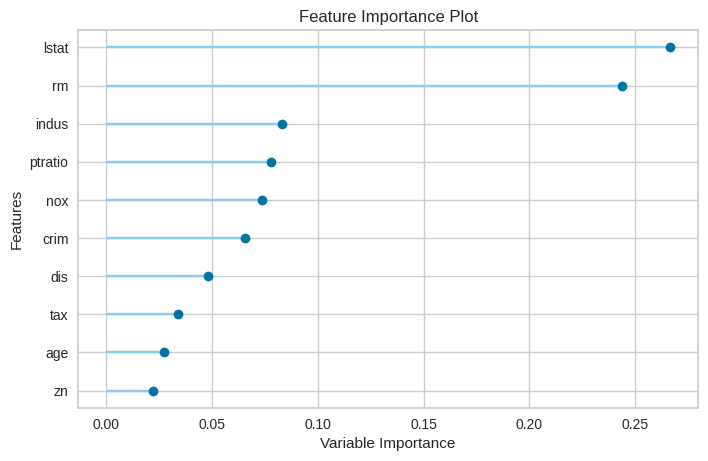

In [ ]:
plot_model(tuned_rf, "feature")

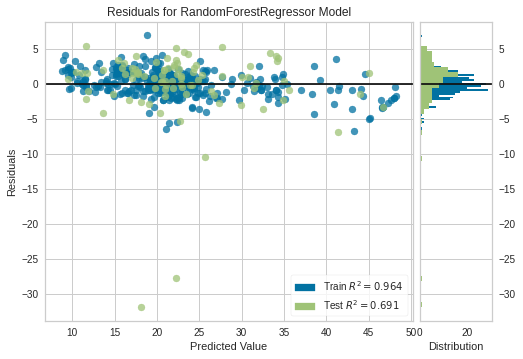

In [ ]:
plot_model(tuned_rf, "residuals")

In [ ]:
plot_model(tuned_rf, "error")

In [ ]:
plot_model(tuned_rf, "learning")

## ノック96：PyCaretで回帰モデルを完成させて再利用しよう

In [ ]:
final_rf = finalize_model(tuned_rf)
final_rf

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=290, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
predict_model(final_rf)

Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Random Forest Regressor  1.4521  3.8375  1.9589  0.9561  0.0882  0.0719

crim    zn  indus  chas  ...  rad_7  rad_8       medv      Label
0    0.117470  12.5   7.87   0.0  ...    0.0    0.0  18.900000  20.420621
1    0.072440  60.0   1.69   0.0  ...    0.0    0.0  18.600000  21.353809
2    0.614700   0.0   6.20   0.0  ...    0.0    1.0  30.100000  27.714919
3    0.071650   0.0  25.65   0.0  ...    0.0    0.0  20.299999  20.365038
4    0.130580   0.0  10.01   0.0  ...    0.0    0.0  20.400000  20.060681
..        ...   ...    ...   ...  ...    ...    ...        ...        ...
86   4.812130   0.0  18.10   0.0  ...    0.0    0.0  16.400000  16.409644
87   0.013600  75.0   4.00   0.0  ...    0.0    0.0  18.900000  19.679399
88  18.811001   0.0  18.10   0.0  ...    0.0    0.0  17.900000  15.351710
89   1.232470   0.0   8.14   0.0  ...    0.0    0.0  15.200000  16.423641
90   0.028990  40.0   1.25   0.0  ...    0.0    0.0  26.600000  25.419922

[91 rows x 23 columns]

In [ ]:
predictions = predict_model(final_rf, data = boston_data_unseen)
print(predictions)

        crim   zn  indus  chas    nox  ...  ptratio   black  lstat  medv      Label
0    4.75237  0.0  18.10     0  0.713  ...     20.2   50.92  18.13  14.1  15.209421
1    4.66883  0.0  18.10     0  0.713  ...     20.2   10.48  19.01  12.7  14.967431
2    8.20058  0.0  18.10     0  0.713  ...     20.2    3.50  16.94  13.5  14.108571
3    7.75223  0.0  18.10     0  0.713  ...     20.2  272.21  16.23  14.9  15.317036
4    6.80117  0.0  18.10     0  0.713  ...     20.2  396.90  14.70  20.0  18.092477
5    4.81213  0.0  18.10     0  0.713  ...     20.2  255.23  16.42  16.4  16.409644
6    3.69311  0.0  18.10     0  0.713  ...     20.2  391.43  14.65  17.7  18.412431
7    6.65492  0.0  18.10     0  0.713  ...     20.2  396.90  13.99  19.5  18.845325
8    5.82115  0.0  18.10     0  0.713  ...     20.2  393.82  10.29  20.2  20.064201
9    7.83932  0.0  18.10     0  0.655  ...     20.2  396.90  13.22  21.4  20.300518
10   3.16360  0.0  18.10     0  0.655  ...     20.2  334.40  14.13  19.9  20

In [ ]:
save_model(final_rf, model_name="final_rf_model")
%ls

Transformation Pipeline and Model Successfully Saved
final_rf_model.pkl  第10章_AutoMLでモデル構築評価を行う10本ノック.ipynb
logs.log


In [ ]:
load_tuned_rf_model = load_model(model_name="final_rf_model")
load_tuned_rf_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['rad'],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['chas'],
                                      target='medv', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                 RandomForestRegressor(bootstrap=False, ccp_alpha=0.0,
                                       criterion='mse', max_depth=7,
                                       max_features='sqrt', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impu

In [ ]:
predictions = predict_model(load_tuned_rf_model, data = boston_data_unseen)
print(predictions)

        crim   zn  indus  chas    nox  ...  ptratio   black  lstat  medv      Label
0    4.75237  0.0  18.10     0  0.713  ...     20.2   50.92  18.13  14.1  15.209421
1    4.66883  0.0  18.10     0  0.713  ...     20.2   10.48  19.01  12.7  14.967431
2    8.20058  0.0  18.10     0  0.713  ...     20.2    3.50  16.94  13.5  14.108571
3    7.75223  0.0  18.10     0  0.713  ...     20.2  272.21  16.23  14.9  15.317036
4    6.80117  0.0  18.10     0  0.713  ...     20.2  396.90  14.70  20.0  18.092477
5    4.81213  0.0  18.10     0  0.713  ...     20.2  255.23  16.42  16.4  16.409644
6    3.69311  0.0  18.10     0  0.713  ...     20.2  391.43  14.65  17.7  18.412431
7    6.65492  0.0  18.10     0  0.713  ...     20.2  396.90  13.99  19.5  18.845325
8    5.82115  0.0  18.10     0  0.713  ...     20.2  393.82  10.29  20.2  20.064201
9    7.83932  0.0  18.10     0  0.655  ...     20.2  396.90  13.22  21.4  20.300518
10   3.16360  0.0  18.10     0  0.655  ...     20.2  334.40  14.13  19.9  20

## ノック97：PyCaretで回帰モデルを解釈しよう

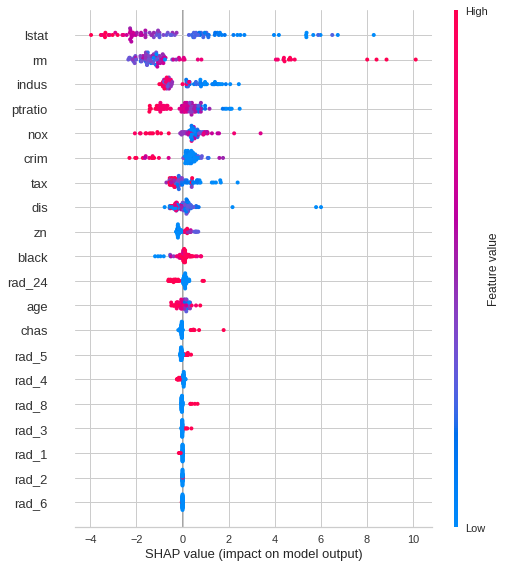

In [ ]:
!pip install shap
import shap
interpret_model(final_rf)

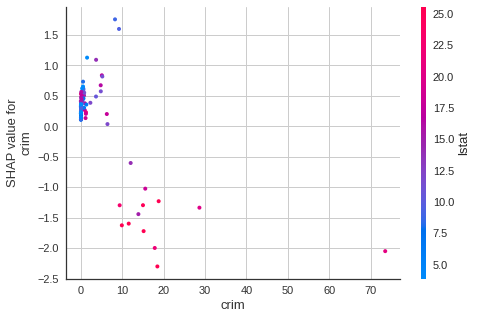

In [ ]:
interpret_model(final_rf, plot="correlation")

In [ ]:
interpret_model(final_rf, plot="reason", observation=1)

## ノック98：PyCaretで分類モデルを構築しよう


In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
load_data = load_breast_cancer()
tg_df_all = pd.DataFrame(load_data.data, columns = load_data.feature_names)
tg_df_all["y"] = load_data.target
tg_df_all

mean radius  mean texture  ...  worst fractal dimension  y
0          17.99         10.38  ...                  0.11890  0
1          20.57         17.77  ...                  0.08902  0
2          19.69         21.25  ...                  0.08758  0
3          11.42         20.38  ...                  0.17300  0
4          20.29         14.34  ...                  0.07678  0
..           ...           ...  ...                      ... ..
564        21.56         22.39  ...                  0.07115  0
565        20.13         28.25  ...                  0.06637  0
566        16.60         28.08  ...                  0.07820  0
567        20.60         29.33  ...                  0.12400  0
568         7.76         24.54  ...                  0.07039  1

[569 rows x 31 columns]

In [ ]:
tg_df = tg_df_all.sample(frac =0.90, random_state = 0).reset_index(drop=True)
tg_df_unseen = tg_df_all.drop(tg_df.index).reset_index(drop=True)
print("All Data: " + str(tg_df.shape))
print("Data for Modeling: " + str(tg_df.shape))
print("Unseen Data For Predictions: " + str(tg_df_unseen.shape))

All Data: (512, 31)
Data for Modeling: (512, 31)
Unseen Data For Predictions: (57, 31)


In [ ]:
from pycaret.classification import *
ret = setup(data = tg_df
      , target = "y"
      , session_id=0
      , normalize = False
      , train_size = 0.6
      , silent=True)

Description             Value
0                               session_id                 0
1                                   Target                 y
2                              Target Type            Binary
3                            Label Encoded        0: 0, 1: 1
4                            Original Data         (512, 31)
5                           Missing Values             False
6                         Numeric Features                30
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (307, 29)
12                    Transformed Test Set         (205, 29)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              b35a
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [ ]:
models()

Name  ...  Turbo
ID                                         ...       
lr                    Logistic Regression  ...   True
knn                K Neighbors Classifier  ...   True
nb                            Naive Bayes  ...   True
dt               Decision Tree Classifier  ...   True
svm                   SVM - Linear Kernel  ...   True
rbfsvm                SVM - Radial Kernel  ...  False
gpc           Gaussian Process Classifier  ...  False
mlp                        MLP Classifier  ...  False
ridge                    Ridge Classifier  ...   True
rf               Random Forest Classifier  ...   True
qda       Quadratic Discriminant Analysis  ...   True
ada                  Ada Boost Classifier  ...   True
gbc          Gradient Boosting Classifier  ...   True
lda          Linear Discriminant Analysis  ...   True
et                 Extra Trees Classifier  ...   True
lightgbm  Light Gradient Boosting Machine  ...   True

[16 rows x 3 columns]

In [ ]:
compare_models(sort = "F1", fold = 10)

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.9673  0.9946   0.985  0.9669   
ridge                    Ridge Classifier    0.9575  0.0000   0.990  0.9495   
dt               Decision Tree Classifier    0.9575  0.9518   0.970  0.9659   
lightgbm  Light Gradient Boosting Machine    0.9542  0.9895   0.980  0.9525   
rf               Random Forest Classifier    0.9542  0.9918   0.975  0.9571   
qda       Quadratic Discriminant Analysis    0.9545  0.9922   0.965  0.9657   
lda          Linear Discriminant Analysis    0.9512  0.9893   0.980  0.9487   
ada                  Ada Boost Classifier    0.9478  0.9900   0.960  0.9611   
gbc          Gradient Boosting Classifier    0.9411  0.9915   0.955  0.9572   
nb                            Naive Bayes    0.9413  0.9896   0.960  0.9524   
lr                    Logistic Regression    0.9346  0.9887   0.965  0.9385   
knn                K Neighbors Classifier    0.9317  0.9572   0.970  0.9330   
svm                   SVM - Linear Kernel    0.9017  0.0000   0.900  0.9547   

              F1   Kappa     MCC  TT (Sec)  
et        0.9754  0.9265  0.9291     0.470  
ridge     0.9686  0.9027  0.9079     0.022  
dt        0.9675  0.9060  0.9076     0.023  
lightgbm  0.9656  0.8968  0.8997     0.082  
rf        0.9655  0.8972  0.8997     0.515  
qda       0.9649  0.9001  0.9020     0.020  
lda       0.9635  0.8897  0.8932     0.023  
ada       0.9600  0.8848  0.8872     0.156  
gbc       0.9553  0.8680  0.8714     0.241  
nb        0.9550  0.8695  0.8741     0.018  
lr        0.9511  0.8524  0.8551     0.295  
knn       0.9495  0.8439  0.8530     0.123  
svm       0.9170  0.7954  0.8128     0.019

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [ ]:
ridge = create_model("ridge", fold = 10)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  0.0    1.00  1.0000  1.0000  1.0000  1.0000
1       0.9355  0.0    1.00  0.9091  0.9524  0.8531  0.8624
2       0.9355  0.0    0.95  0.9500  0.9500  0.8591  0.8591
3       0.9677  0.0    1.00  0.9524  0.9756  0.9281  0.9305
4       0.9677  0.0    0.95  1.0000  0.9744  0.9310  0.9332
5       0.9355  0.0    1.00  0.9091  0.9524  0.8531  0.8624
6       1.0000  0.0    1.00  1.0000  1.0000  1.0000  1.0000
7       0.9000  0.0    1.00  0.8696  0.9302  0.7568  0.7802
8       0.9667  0.0    1.00  0.9524  0.9756  0.9231  0.9258
9       0.9667  0.0    1.00  0.9524  0.9756  0.9231  0.9258
Mean    0.9575  0.0    0.99  0.9495  0.9686  0.9027  0.9079
SD      0.0296  0.0    0.02  0.0416  0.0212  0.0702  0.0645

In [ ]:
tuned_ridge = tune_model(ridge, optimize = "F1", fold = 10, n_iter = 100)
tuned_ridge

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  0.0    1.00  1.0000  1.0000  1.0000  1.0000
1       0.9355  0.0    1.00  0.9091  0.9524  0.8531  0.8624
2       0.9355  0.0    0.95  0.9500  0.9500  0.8591  0.8591
3       0.9677  0.0    1.00  0.9524  0.9756  0.9281  0.9305
4       0.9677  0.0    0.95  1.0000  0.9744  0.9310  0.9332
5       0.9677  0.0    1.00  0.9524  0.9756  0.9281  0.9305
6       1.0000  0.0    1.00  1.0000  1.0000  1.0000  1.0000
7       0.9000  0.0    1.00  0.8696  0.9302  0.7568  0.7802
8       0.9667  0.0    1.00  0.9524  0.9756  0.9231  0.9258
9       0.9667  0.0    1.00  0.9524  0.9756  0.9231  0.9258
Mean    0.9608  0.0    0.99  0.9538  0.9709  0.9102  0.9148
SD      0.0287  0.0    0.02  0.0394  0.0206  0.0685  0.0629

RidgeClassifier(alpha=0.65, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=0, solver='auto',
                tol=0.001)

## ノック99：PyCaretで分類モデルを評価しよう

In [ ]:
evaluate_model(tuned_ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

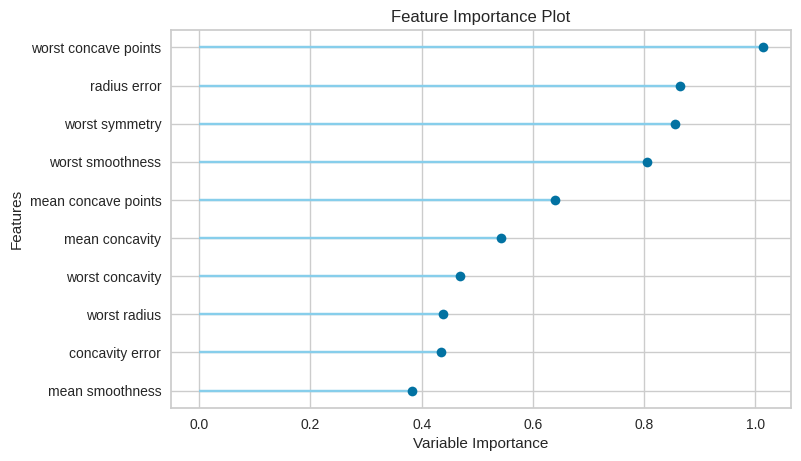

In [ ]:
plot_model(tuned_ridge, "feature")

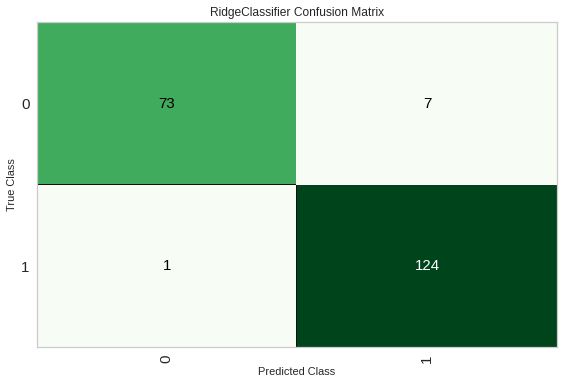

In [ ]:
plot_model(tuned_ridge, plot = "confusion_matrix")

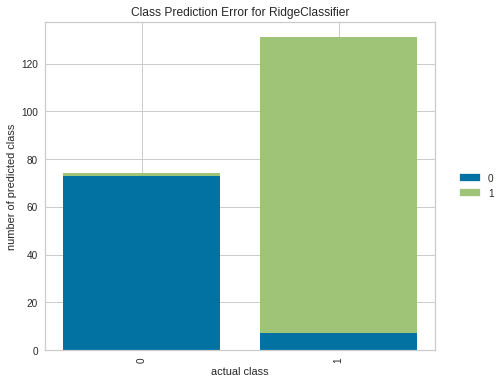

In [ ]:
plot_model(tuned_ridge, "error")

In [ ]:
final_ridge = finalize_model(tuned_ridge)
predict_model(final_ridge)
predictions = predict_model(final_ridge, data = tg_df_unseen)
print(predictions)

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0  Ridge Classifier    0.9561  0.9438     1.0  0.9328  0.9653  0.9058  0.9099

    mean radius  mean texture  ...  y  Label
0        13.400         20.52  ...  0      0
1        14.580         13.66  ...  1      1
2        15.050         19.07  ...  0      1
3        11.340         18.61  ...  1      1
4        18.310         20.58  ...  0      0
5        19.890         20.26  ...  0      0
6        12.880         18.22  ...  1      1
7        12.750         16.70  ...  1      1
8         9.295         13.90  ...  1      1
9        24.630         21.60  ...  0      0
10       11.260         19.83  ...  1      1
11       13.710         18.68  ...  1      1
12        9.847         15.68  ...  1      1
13        8.571         13.10  ...  1      1
14       13.460         18.75  ...  1      1
15       12.340         12.27  ...  1      1
16       13.940         13.17  ...  1      1
17       12.070         13.44  ...  1      1
18       11.750         17.56  ...  1      1
19       11.670         20.02  ...  1      1
20       13.680         16.33  ...  1      1
21       2

## ノック100：PyCaretでクラスタリングを実施してPCAで可視化しよう

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)

In [ ]:
from pycaret.clustering import *
data_clust = setup(data = df_iris
                   , normalize = False 
                   , session_id = 0
                   , silent=True)

Description                 Value
0                               session_id                     0
1                            Original Data              (150, 4)
2                           Missing Values                 False
3                         Numeric Features                     4
4                     Categorical Features                     0
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data              (150, 4)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  cluster-default-name
13                                     USI                  f35f
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                 False
22                        Normalize Method                  None
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

In [ ]:
models()

Name                                          Reference
ID                                                                                            
kmeans                   K-Means Clustering                     sklearn.cluster._kmeans.KMeans
ap                     Affinity Propagation  sklearn.cluster._affinity_propagation.Affinity...
meanshift             Mean Shift Clustering              sklearn.cluster._mean_shift.MeanShift
sc                      Spectral Clustering       sklearn.cluster._spectral.SpectralClustering
hclust             Agglomerative Clustering  sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan     Density-Based Spatial Clustering                     sklearn.cluster._dbscan.DBSCAN
optics                    OPTICS Clustering                     sklearn.cluster._optics.OPTICS
birch                      Birch Clustering                       sklearn.cluster._birch.Birch
kmodes                   K-Modes Clustering                               kmodes.kmodes.KModes

In [ ]:
kmeans = create_model("kmeans", num_clusters=3)
print(kmeans)

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.5528           561.6277  ...           0             0

[1 rows x 6 columns]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=0, tol=0.0001, verbose=0)


In [ ]:
plot_model(kmeans)

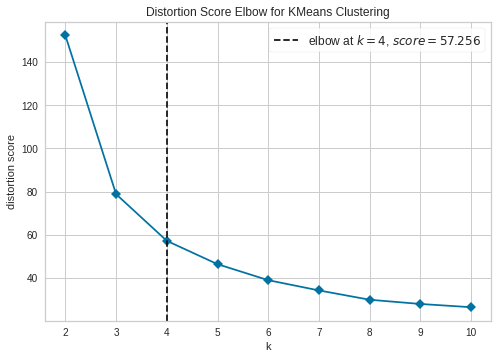

In [ ]:
plot_model(kmeans, plot = "elbow")

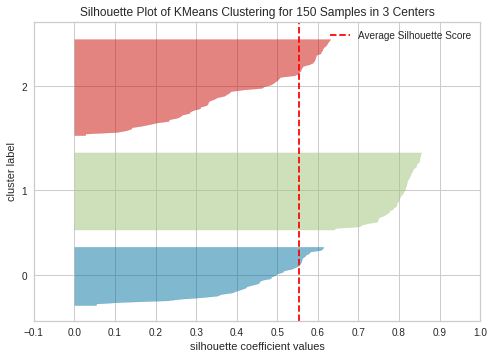

In [ ]:
plot_model(kmeans, plot = "silhouette")

In [ ]:
ret = predict_model(kmeans, data=df_iris)
ret

sepal length (cm)  sepal width (cm)  ...  petal width (cm)    Cluster
0                  5.1               3.5  ...               0.2  Cluster 1
1                  4.9               3.0  ...               0.2  Cluster 1
2                  4.7               3.2  ...               0.2  Cluster 1
3                  4.6               3.1  ...               0.2  Cluster 1
4                  5.0               3.6  ...               0.2  Cluster 1
..                 ...               ...  ...               ...        ...
145                6.7               3.0  ...               2.3  Cluster 0
146                6.3               2.5  ...               1.9  Cluster 2
147                6.5               3.0  ...               2.0  Cluster 0
148                6.2               3.4  ...               2.3  Cluster 0
149                5.9               3.0  ...               1.8  Cluster 2

[150 rows x 5 columns]